In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report, make_scorer, f1_score
from sklearn.model_selection import KFold, cross_val_score, StratifiedKFold

file_path = "E:/desktop/postgraduate dissertation/ONLINE EDUCATION SYSTEM REVIEW.csv"
df = pd.read_csv(file_path)
df.head()

,Gender,Home Location,Level of Education,Age(Years),Number of Subjects,Device type used to attend classes,Economic status,Family size,Internet facility in your locality,Are you involved in any sports?,...,Interested in Gaming?,Have separate room for studying?,Engaged in group studies?,Average marks scored before pandemic in traditional classroom,Your interaction in online mode,Clearing doubts with faculties in online mode,Interested in?,Performance in online,Your level of satisfaction in Online Education,Unnamed: 23
0,Male,Urban,Under Graduate,18,11,Laptop,Middle Class,4,5,No,...,No,No,No,91-100,1,1,Practical,6,Average,NaN
1,Male,Urban,Under Graduate,19,7,Laptop,Middle Class,4,1,Yes,...,Yes,Yes,No,91-100,1,1,Theory,3,Bad,NaN
2,Male,Rural,Under Graduate,18,5,Laptop,Middle Class,5,2,No,...,No,Yes,No,71-80,1,1,Both,6,Bad,NaN
3,Male,Urban,Under Graduate,18,5,Laptop,Middle Class,4,4,Yes,...,No,No,yes,91-100,1,2,Theory,4,Bad,NaN
4,Male,Rural,Under Graduate,18,5,Laptop,Middle Class,4,3,No,...,Yes,Yes,yes,81-90,3,3,Both,6,Average,NaN


In [13]:
df.columns

Index(['Gender', 'Home Location', 'Level of Education', 'Age(Years)',
       'Number of Subjects', 'Device type used to attend classes',
       'Economic status', 'Family size', 'Internet facility in your locality',
       'Are you involved in any sports?', 'Do elderly people monitor you?',
       'Study time (Hours)', 'Sleep time (Hours)',
       'Time spent on social media (Hours)', 'Interested in Gaming?',
       'Have separate room for studying?', 'Engaged in group studies?',
       'Average marks scored before pandemic in traditional classroom',
       'Your interaction in online mode',
       'Clearing doubts with faculties in online mode', 'Interested in?',
       'Performance in online',
       'Your level of satisfaction in Online Education', 'Unnamed: 23'],
      dtype='object')

In [14]:
# RQ3: Are there distinct behavioral profiles of students in online education, and how do these profiles 
#      relate to academic performance and satisfaction?

In [15]:
# --- Rename columns for easier access ---
df = df.rename(columns={
    "Study time (Hours)": "StudyTime",
    "Time spent on social media (Hours)": "SocialMedia",
    "Your interaction in online mode": "Interaction",
    "Engaged in group studies?": "GroupStudy",
    "Interested in Gaming?": "Gaming",
    "Performance in online": "Performance",
    "Your level of satisfaction in Online Education": "Satisfaction"
})

# --- Select relevant columns for behavioral clustering ---
features = ["StudyTime", "SocialMedia", "Interaction", "GroupStudy", "Gaming", "Performance", "Satisfaction"]
df_behavior = df[features].copy()

# --- Convert categorical columns to numeric ---
df_behavior["GroupStudy"] = df_behavior["GroupStudy"].map({"Yes": 1, "No": 0})
df_behavior["Gaming"] = df_behavior["Gaming"].map({"Yes": 1, "No": 0})
df_behavior["Satisfaction"] = df_behavior["Satisfaction"].map({"Bad": 1, "Average": 2, "Good": 3})

# --- Drop rows with any missing values ---
df_behavior = df_behavior.dropna()

# --- Impute (not strictly necessary here anymore since we've dropped NA, but keeping for completeness) ---
imputer = SimpleImputer(strategy="mean")
X_imputed = imputer.fit_transform(df_behavior)

# --- Standardize ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# --- Fit KMeans ---
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df_behavior["Cluster"] = kmeans.fit_predict(X_scaled)

# --- Cluster-wise average summary ---
cluster_summary = df_behavior.groupby("Cluster")[features].mean().round(2)
print(cluster_summary)

         StudyTime  SocialMedia  Interaction  GroupStudy  Gaming  Performance  \
Cluster                                                                         
0             3.47         3.01         1.66         0.0    0.51         4.53   
1             4.72         2.27         3.26         0.0    0.00         7.18   
2             4.52         2.48         3.29         0.0    1.00         7.36   

         Satisfaction  
Cluster                
0                1.27  
1                2.24  
2                2.25  


Cluster Summary Table:
         StudyTime  SocialMedia  Interaction  GroupStudy  Gaming  Performance  \
Cluster                                                                         
0             2.90         6.01         2.35         0.0    0.44         5.82   
1             4.44         2.16         2.91         0.0    1.00         6.64   
2             4.59         1.91         2.90         0.0    0.00         6.61   

         Satisfaction  
Cluster                
0                1.80  
1                1.99  
2                2.01  


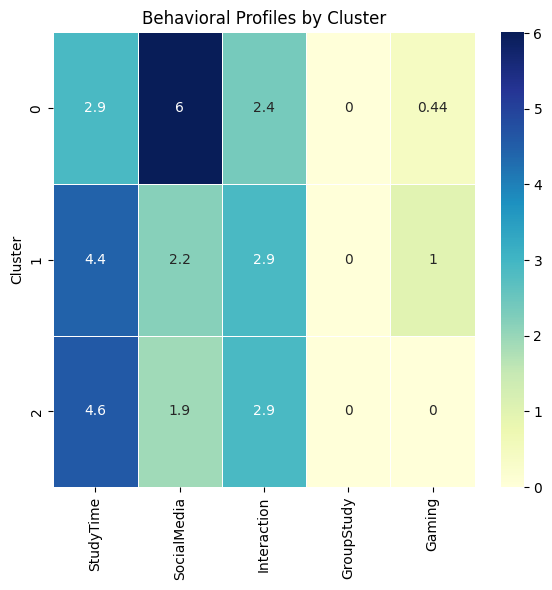

In [16]:
# Standardize behavioral features (excluding target vars)
scaler = StandardScaler()
X = df_behavior[["StudyTime", "SocialMedia", "Interaction", "GroupStudy", "Gaming"]]
X_scaled = scaler.fit_transform(X)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df_behavior["Cluster"] = kmeans.fit_predict(X_scaled)

# Calculate cluster-wise average values
cluster_summary = df_behavior.groupby("Cluster")[features].mean().round(2)
print("Cluster Summary Table:")
print(cluster_summary)

# Heatmap of behavioral patterns per cluster
plt.figure(figsize=(6, 6))
sns.heatmap(cluster_summary[["StudyTime", "SocialMedia", "Interaction", "GroupStudy", "Gaming"]],
            annot=True, cmap="YlGnBu", linewidths=0.5)
plt.title("Behavioral Profiles by Cluster")
plt.ylabel("Cluster")
plt.tight_layout()
plt.show()

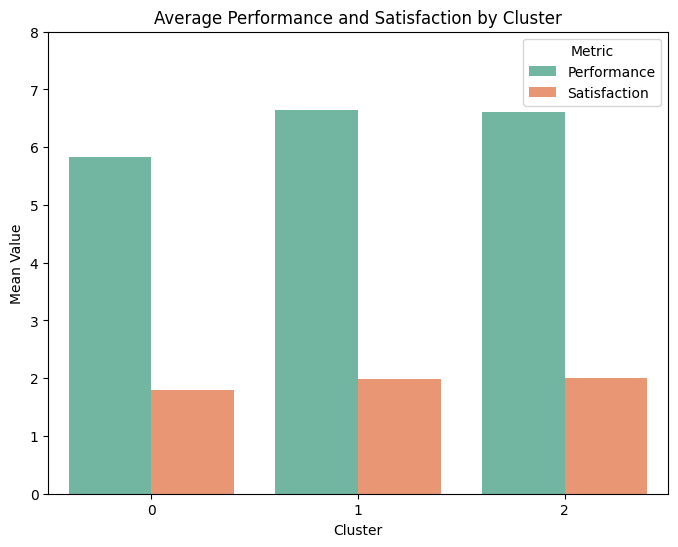

<Figure size 600x600 with 0 Axes>

In [17]:
# Group by cluster and compute mean of Performance and Satisfaction
cluster_perf_sat = df_behavior.groupby("Cluster")[["Performance", "Satisfaction"]].mean().reset_index()

# Melt the dataframe for easier plotting
cluster_perf_sat_melted = cluster_perf_sat.melt(id_vars="Cluster", var_name="Metric", value_name="MeanValue")

# Set up the figure
plt.figure(figsize=(8, 6))
sns.barplot(data=cluster_perf_sat_melted, x="Cluster", y="MeanValue", hue="Metric", palette="Set2")

# Titles and labels
plt.title("Average Performance and Satisfaction by Cluster")
plt.ylabel("Mean Value")
plt.xlabel("Cluster")
plt.ylim(0, 8)  # Adjust based on your scale
plt.legend(title="Metric")
plt.figure(figsize=(6, 6))  
plt.tight_layout()

# Show plot
plt.show()

In [18]:
# RQ4: To what extent can students' academic performance and satisfaction be predicted using behavioral, demographic, 
#      and technological features in online education?

In [19]:
# Select predictors and targets
features = ["Gender", "Home Location", "Level of Education", "Device type used to attend classes",
            "Economic status", "Internet facility in your locality", "StudyTime", "SocialMedia",
            "Interaction", "GroupStudy", "Gaming"]

# Filter out rows with missing values in key variables
predictors = features.copy()
predictors = predictors + ["Performance", "Satisfaction"]
df_model = df[predictors].dropna()

# Encode categorical variables
categorical_vars = ["Gender", "Home Location", "Level of Education", "Device type used to attend classes",
                    "Economic status", "Internet facility in your locality", "GroupStudy", "Gaming"]

label_encoders = {}
for col in categorical_vars:
    le = LabelEncoder()
    df_model[col] = le.fit_transform(df_model[col])
    label_encoders[col] = le

# Encode satisfaction labels to numeric (for classification)
sat_le = LabelEncoder()
df_model["Satisfaction"] = sat_le.fit_transform(df_model["Satisfaction"])  # e.g., Bad=0, Average=1, Good=2

# Standardize numerical features
numerical_vars = ["StudyTime", "SocialMedia", "Interaction"]
scaler = StandardScaler()
df_model[numerical_vars] = scaler.fit_transform(df_model[numerical_vars])

# ----------------------------
# Model 1: Predicting Performance (Regression)
# ----------------------------
X_perf = df_model[features]
y_perf = df_model["Performance"]

X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_perf, y_perf, test_size=0.2, random_state=42)

rf_perf = RandomForestRegressor(random_state=42)
rf_perf.fit(X_train_p, y_train_p)
y_pred_p = rf_perf.predict(X_test_p)

print("--- Academic Performance Prediction ---")
print("R-squared:", r2_score(y_test_p, y_pred_p))
print("MSE:", mean_squared_error(y_test_p, y_pred_p))

# ----------------------------
# Model 2: Predicting Satisfaction (Classification)
# ----------------------------
X_sat = df_model[features]
y_sat = df_model["Satisfaction"]

X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_sat, y_sat, test_size=0.2, random_state=42)

rf_sat = RandomForestClassifier(random_state=42)
rf_sat.fit(X_train_s, y_train_s)
y_pred_s = rf_sat.predict(X_test_s)

print("\n--- Satisfaction Prediction ---")
print("Accuracy:", accuracy_score(y_test_s, y_pred_s))
print(classification_report(y_test_s, y_pred_s, target_names=sat_le.classes_))


--- Academic Performance Prediction ---
R-squared: 0.3150774107040334
MSE: 2.668846768867692

--- Satisfaction Prediction ---
Accuracy: 0.6038647342995169
              precision    recall  f1-score   support

     Average       0.60      0.78      0.68       101
         Bad       0.60      0.53      0.56        47
        Good       0.62      0.36      0.45        59

    accuracy                           0.60       207
   macro avg       0.61      0.56      0.56       207
weighted avg       0.61      0.60      0.59       207



In [24]:
# --- 1) Regression CV for Performance (use training split) ---
kf = KFold(n_splits=10, shuffle=True, random_state=42)

rf_perf_cv = RandomForestRegressor(random_state=42)
cv_scores_reg_r2 = cross_val_score(
    rf_perf_cv,
    X_train_p, y_train_p,
    cv=kf,
    scoring='r2'
)

print("\n[CV] Performance (Regression) - 10-Fold R^2:")
print(cv_scores_reg_r2)
print("Mean R^2:", np.mean(cv_scores_reg_r2))
print("Std  R^2:", np.std(cv_scores_reg_r2))

# --- 2) Classification CV for Satisfaction (use training split) ---
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

rf_sat_cv = RandomForestClassifier(random_state=42)

# Accuracy
cv_scores_clf_acc = cross_val_score(
    rf_sat_cv,
    X_train_s, y_train_s,
    cv=skf,
    scoring='accuracy'
)

print("\n[CV] Satisfaction (Classification) - 10-Fold Accuracy:")
print(cv_scores_clf_acc)
print("Mean Accuracy:", np.mean(cv_scores_clf_acc))
print("Std  Accuracy:", np.std(cv_scores_clf_acc))


[CV] Performance (Regression) - 10-Fold R^2:
[0.31525221 0.17950228 0.30643744 0.15086146 0.13551318 0.35537887
 0.34185391 0.08994752 0.21980515 0.15996769]
Mean R^2: 0.22545197234947495
Std  R^2: 0.0913776654863171

[CV] Satisfaction (Classification) - 10-Fold Accuracy:
[0.60240964 0.60240964 0.65060241 0.54216867 0.4939759  0.56626506
 0.68292683 0.56097561 0.59756098 0.54878049]
Mean Accuracy: 0.584807522774023
Std  Accuracy: 0.05197775448345896


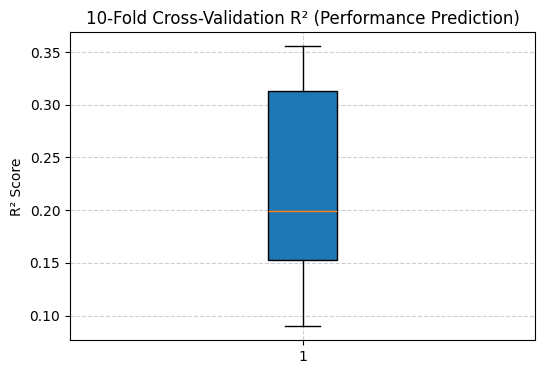

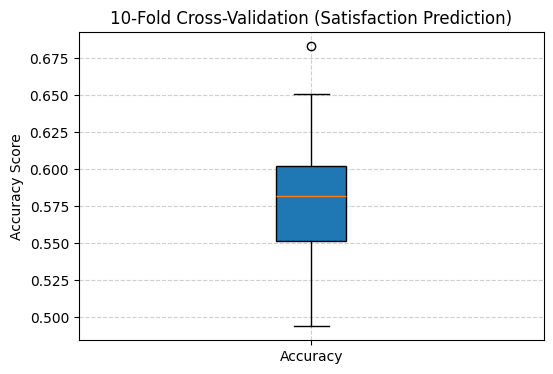

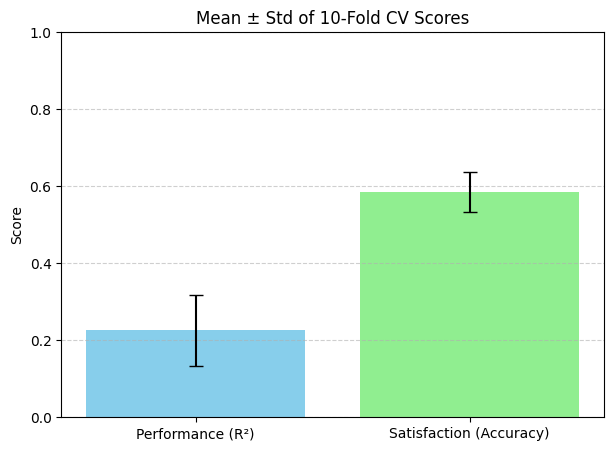

In [26]:
# --- Visualization of CV results ---
# 1) Boxplot for regression R²
plt.figure(figsize=(6, 4))
plt.boxplot(cv_scores_reg_r2, vert=True, patch_artist=True)
plt.title("10-Fold Cross-Validation R² (Performance Prediction)")
plt.ylabel("R² Score")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# 2) Boxplot for classification Accuracy
plt.figure(figsize=(6, 4))
plt.boxplot(cv_scores_clf_acc, vert=True, patch_artist=True, labels=["Accuracy"])
plt.title("10-Fold Cross-Validation (Satisfaction Prediction)")
plt.ylabel("Accuracy Score")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# 3) Bar chart for mean ± std scores
mean_scores = [np.mean(cv_scores_reg_r2), np.mean(cv_scores_clf_acc)]
std_scores  = [np.std(cv_scores_reg_r2),  np.std(cv_scores_clf_acc)]
labels = ["Performance (R²)", "Satisfaction (Accuracy)"]

plt.figure(figsize=(7, 5))
plt.bar(labels, mean_scores, yerr=std_scores, capsize=5, color=['skyblue', 'lightgreen'])
plt.title("Mean ± Std of 10-Fold CV Scores")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()